# urlib

In [2]:
from urllib.request import urlopen, Request
import urllib

url = "http://ghmkt.kr/" #요청을 하고자 하는 웹 사이트입니다.

req = Request(url)  #요청 객체를 만드는 부분입니다.
page = urlopen(req) #만들어진 요청 객체를 이용하여 요청하는 부분입니다.

print(page)

print(page.headers)
print(page.url)
print(page.info().get_content_charset())
#print(page.read())   #urllib은 read()함수를 이용하여 HTML을 바이너리 형태로 가져옵니다.

200
Date: Sat, 29 Sep 2018 06:40:55 GMT
Server: Apache/2.4.7 (Ubuntu)
X-Powered-By: PHP/5.5.9-1ubuntu4.26
Set-Cookie: ci_kisession=a%3A5%3A%7Bs%3A10%3A%22session_id%22%3Bs%3A32%3A%226145406f8f1166dfb4a2da3023f15b1b%22%3Bs%3A10%3A%22ip_address%22%3Bs%3A13%3A%22130.211.1.249%22%3Bs%3A10%3A%22user_agent%22%3Bs%3A17%3A%22Python-urllib%2F3.6%22%3Bs%3A13%3A%22last_activity%22%3Bi%3A1538203255%3Bs%3A9%3A%22user_data%22%3Bs%3A0%3A%22%22%3B%7Db7a4da157d97feb66a1a978b00d9c122; path=/; domain=.ghmkt.kr
P3P: CP="NOI CURa ADMa DEVa TAIa OUR DELa BUS IND PHY ONL UNI COM NAV INT DEM PRE"
Cache-Control: max-age=0, no-cache, pre-check=0, post-check=0
Pragma: no-cache
Set-Cookie: ci_kisession=a%3A4%3A%7Bs%3A10%3A%22session_id%22%3Bs%3A32%3A%226145406f8f1166dfb4a2da3023f15b1b%22%3Bs%3A10%3A%22ip_address%22%3Bs%3A13%3A%22130.211.1.249%22%3Bs%3A10%3A%22user_agent%22%3Bs%3A17%3A%22Python-urllib%2F3.6%22%3Bs%3A13%3A%22last_activity%22%3Bi%3A1538203255%3B%7D5f5d1c4c8659cfd52f94f9172b9d5b70; path=/; domain=.gh

200


# BeautifulSoup

In [2]:
from bs4 import BeautifulSoup as bs

html = """<html> <head> </head> <body> <p>test</p> </body></html>"""

soup = bs(html, 'lxml')
print(soup)
print(type(soup))
print()
print(soup.prettify())

<html> <head> </head> <body> <p>test</p> </body></html>
<class 'bs4.BeautifulSoup'>

<html>
 <head>
 </head>
 <body>
  <p>
   test
  </p>
 </body>
</html>


In [3]:
from bs4 import BeautifulSoup

html = """<html> <head> </head> <body> <p>test</p> </body></html>"""

soup = BeautifulSoup(html, 'lxml') #bs라는 이름으로 불러왔으니 보통 bs(html, 'lxml')로 쓴다.
print(soup.prettify())

<html>
 <head>
 </head>
 <body>
  <p>
   test
  </p>
 </body>
</html>


In [4]:
from bs4 import BeautifulSoup as bs

html = """<html> <head><title class = 'GH' id = "이재경"> Crawling </title> </head> <body> <p>Growth</p> 
<p>Hackers</p> <p>GH</p></body></html>"""

soup = BeautifulSoup(html, 'lxml')
tag_p = soup.p # p태그를 가져온다. 

print(tag_p)
print(tag_p.text) # p 태그 안에 텍스트를 가져온다. 
print(tag_p.string) # 덱스트 보다 범용성이 낮다?
print(tag_p.name) # 태그 이름을 반환?

tag_title= soup.title

print();print(tag_title.attrs) # 타이틀의 속성을 딕셔너리 형태로 
print(tag_title['class'])
print(tag_title['id'])

print(); print(tag_title.get('class1'))
print(tag_title.get('class1','없음'))


<p>Growth</p>
Growth
Growth
p

{'class': ['GH'], 'id': '이재경'}
['GH']
이재경

None
없음


In [5]:
from bs4 import BeautifulSoup as bs

html = """<html> <head><title > Crawling </title> </head> <body>
<p><span>Growth</span><span>Hackers</span><span>GH</span></p></body></html>"""
# p라는 태크 안에 span이라는 태그가 있는데, span은 p의 자식태그  p는 span의 자식태크.
soup = BeautifulSoup(html, 'lxml')
tag_p_child = soup.p.children

print('p 자식 태그')
for child in tag_p_child:
    print(child)
    
tag_span = soup.span
span_parents = tag_span.parents

print('span 부모 태그')
for parent in span_parents:
    print(parent)

next_sibling = tag_span.next_sibling # 형제 태그? 잘 사용하지는 없는다. 
prev_sibling = next_sibling.previous_sibling

print(next_sibling)
print(prev_sibling)


p 자식 태그
<span>Growth</span>
<span>Hackers</span>
<span>GH</span>
span 부모 태그
<p><span>Growth</span><span>Hackers</span><span>GH</span></p>
<body>
<p><span>Growth</span><span>Hackers</span><span>GH</span></p></body>
<html> <head><title> Crawling </title> </head> <body>
<p><span>Growth</span><span>Hackers</span><span>GH</span></p></body></html>
<html> <head><title> Crawling </title> </head> <body>
<p><span>Growth</span><span>Hackers</span><span>GH</span></p></body></html>
<span>Hackers</span>
<span>Growth</span>


In [6]:
##find_all( ) 함수를 사용하면 원하는 태그들을 리스트의 형태로 얻어올 수 있다.
# 가장 많이 사용하는 함수 중 하나. 
html = """<html> <head><title class = 'GH' id = "이재경"> Crawling </title> </head> <body> <p>Growth</p> 
<p>Hackers</p> <p id= "GH">GH</p></body></html>"""

soup = BeautifulSoup(html, 'lxml')

print(soup.find_all('p')) # 모든 p 태그를 리스트 형태로 반환.
print(soup.find('p')) # 첫번째만 반환. 
print(soup.find_all(id='이재경'))
print(soup.body.find_all(id=False))
print(soup.find_all('p',id='GH'))
print(soup.find_all('title',class_='GH')) #class_는 기존의 클래스를 만들 때 사용하는 키워드인 class와 중복을 피해주기 위해서 사용
print(soup.find_all('title','GH'))

for name in soup.find_all('title','GH'):
    print(name.get_text())

[<p>Growth</p>, <p>Hackers</p>, <p id="GH">GH</p>]
<p>Growth</p>
[<title class="GH" id="이재경"> Crawling </title>]
[<p>Growth</p>, <p>Hackers</p>]
[<p id="GH">GH</p>]
[<title class="GH" id="이재경"> Crawling </title>]
[<title class="GH" id="이재경"> Crawling </title>]
 Crawling 


In [7]:
##select() 함수를 이용하면 find_all() 처럼 리스트로 반환하지만 CSS 셀렉터를 활용하여 원하는 요소에 접근합니다.

html = """<html> <head><title class = 'GH' id = "이재경"> Crawling </title> </head> 
<body> <p id = "i" class = "a">Growth</p> <p class= "d">Hackers</p> <p class= "d">GH</p></body></html>"""

soup = BeautifulSoup(html, 'lxml')

print(soup.select('p')) #클래스는 마침표(.), 아이디는 샵(#)으로 접근
print(soup.select('.d'))
print(soup.select('p.d'))
print(soup.select('#i'))
print(soup.select('p#i'))
print(soup.select('body > p#i'))  #띄어쓰기를 이용하거나(body p#i) '>'를 이용하여 자식 태그 표현


[<p class="a" id="i">Growth</p>, <p class="d">Hackers</p>, <p class="d">GH</p>]
[<p class="d">Hackers</p>, <p class="d">GH</p>]
[<p class="d">Hackers</p>, <p class="d">GH</p>]
[<p class="a" id="i">Growth</p>]
[<p class="a" id="i">Growth</p>]
[<p class="a" id="i">Growth</p>]


# 정규식

In [8]:
#find_all( )과 find( )를 사용할 때 정규식을 사용하면 좀 더 활용도가 높아집니다

from bs4 import BeautifulSoup as bs
import re

test_str = "test tlsd j test1"

pattern = re.compile('test') # 찾고자 하는 패턴을 저장. 

a = pattern.match(test_str)
b = pattern.search(test_str)
c = pattern.findall(test_str)
d = pattern.finditer(test_str)

print('--match result--') #처음 시작부터 정규식과 일치해야 match가 이루어지며 정규식과 다르면 에러가 난다 
print(a)
print(a.group(),a.start, a.end(),a.span())
print()

print('--search result--') # 문자열에서 일치하는 정규식을 하나 찾아준다
print(b)
print(b.group(),b.start, b.end(),b.span())
print()

print('--findall result--') #정규식과 매치되는 모든 문자열을 리스트로 반환한다
print(c)
print()

print('--finditer result--') #정규식과 매치되는 모든 문자열을 iterable 객체로 반환하기에 반복문을 이용해야 한다
print(d)
for i in d:
    print(i.group(),i.start, i.end(),i.span())

--match result--
<_sre.SRE_Match object; span=(0, 4), match='test'>
test <built-in method start of _sre.SRE_Match object at 0x000001759B766BF8> 4 (0, 4)

--search result--
<_sre.SRE_Match object; span=(0, 4), match='test'>
test <built-in method start of _sre.SRE_Match object at 0x000001759B766ED0> 4 (0, 4)

--findall result--
['test', 'test']

--finditer result--
test <built-in method start of _sre.SRE_Match object at 0x000001759B766C60> 4 (0, 4)
test <built-in method start of _sre.SRE_Match object at 0x000001759B766E68> 16 (12, 16)


In [9]:
p = re.compile("Grow[a-zA-Z]*[0-9]+")
# + 

print(p.match("GrowthHackers3"))
print(p.search("GrowthHackers3"))
print(p.match("GrowthHackers"))

p.findall("GrowthHackers GrowthHackers3 GrowthHacker4")


<_sre.SRE_Match object; span=(0, 14), match='GrowthHackers3'>
<_sre.SRE_Match object; span=(0, 14), match='GrowthHackers3'>
None


['GrowthHackers3', 'GrowthHacker4']

In [10]:
import re

test_str= """Good afternoon 222"""

pattern = re.compile('[a-z]') # 대문자는 빠진다. 
pattern1 = re.compile('[a-z]+')
pattern2 = re.compile('[a-zA-Z]*')
pattern3 = re.compile('[a-zA-Z0-9]')
pattern4 = re.compile('\w+')
pattern5 = re.compile('[^a-z]+') # ^ 소문자가 들어가지 않는 것을 찾을 때.

a = pattern.findall(test_str)
b = pattern1.findall(test_str)
c = pattern2.findall(test_str)
d = pattern3.findall(test_str)
e = pattern4.findall(test_str)
f = pattern5.findall(test_str)

print(a)
print(b)
print(c)
print(d)
print(e)
print(f)

['o', 'o', 'd', 'a', 'f', 't', 'e', 'r', 'n', 'o', 'o', 'n']
['ood', 'afternoon']
['Good', '', 'afternoon', '', '', '', '', '']
['G', 'o', 'o', 'd', 'a', 'f', 't', 'e', 'r', 'n', 'o', 'o', 'n', '2', '2', '2']
['Good', 'afternoon', '222']
['G', ' ', ' 222']


In [60]:
import re

test_num = "저의 전화번호는 010-6354-0802 입니다"

pattern = re.compile('[0-9][0-9][0-9]-[0-9][0-9][0-9][0-9]-[0-9][0-9][0-9][0-9]')
pattern1 = re.compile('\d\d\d-\d\d\d\d-\d\d\d\d')
pattern2 = re.compile('\d{3}-\d{4}-\d{4}')

a = pattern.findall(test_num)
b = pattern1.findall(test_num)
c = pattern2.findall(test_num)

print(a)
print(b)
print(c)

['010-6354-0802']
['010-6354-0802']
['010-6354-0802']


In [61]:
import re

test_str = """test tests toast toasts"""

pattern = re.compile('t..t')
pattern1 = re.compile('t...t')
pattern2 = re.compile('t?est\w+')
pattern3 = re.compile('t?est\w*')

a = pattern.findall(test_str)
b = pattern1.findall(test_str)
c = pattern2.findall(test_str)
d = pattern3.findall(test_str)

print(a)
print(b)
print(c)
print(d)

['test', 'test']
['toast', 'toast']
['tests']
['test', 'tests']


# Selenium

In [62]:
# import selenium
# 웹브라우저를 컨트롤하는 라이브러리. 서버가 막힐 때 사용한다. 
# Selenium을 쓰는 가장 큰 이유는 자바스크립트를 실행시켜서 크롤링해서 bs4를 활용하기 위함.
from selenium import webdriver
import time
import requests
from selenium.webdriver.common.keys import Keys

In [63]:
path = 'C:/Users/renz/chromedriver.exe' # 크롬드라이브 경로 지정  ## 맥과 리눅스는 exe.를 붙이지 않습니다. 

driver = webdriver.Chrome(path)

In [64]:
driver.get("https://amazon.com") # 접근하고 싶은 주소를 적는다. 

In [79]:
#3초간 쉬는 명령어
time.sleep(3) # = driver.implicitly_wait(3)
# naver에 접속한다
driver.get("https://naver.com")
# 현재 페이지 확인
print(driver.current_url)
# 크롬에서 주소창위에 나오는 이름
print(driver.title)

https://www.naver.com/
NAVER


In [67]:
search = driver.find_element_by_id('query')

In [68]:
from selenium.webdriver.common.keys import Keys

In [69]:
search.send_keys("Growth hacking")

In [70]:
search.submit()

In [80]:
#해당 사이트 제목이 NAVER인지 확인
assert 'NAVER' in driver.title

In [81]:
#사이트의 title이 다르면 Error 메시지가 뜬다.
assert 'Google' in driver.title 

AssertionError: 

In [82]:
#스크린샷 기능
driver.save_screenshot('chrome.png')

True

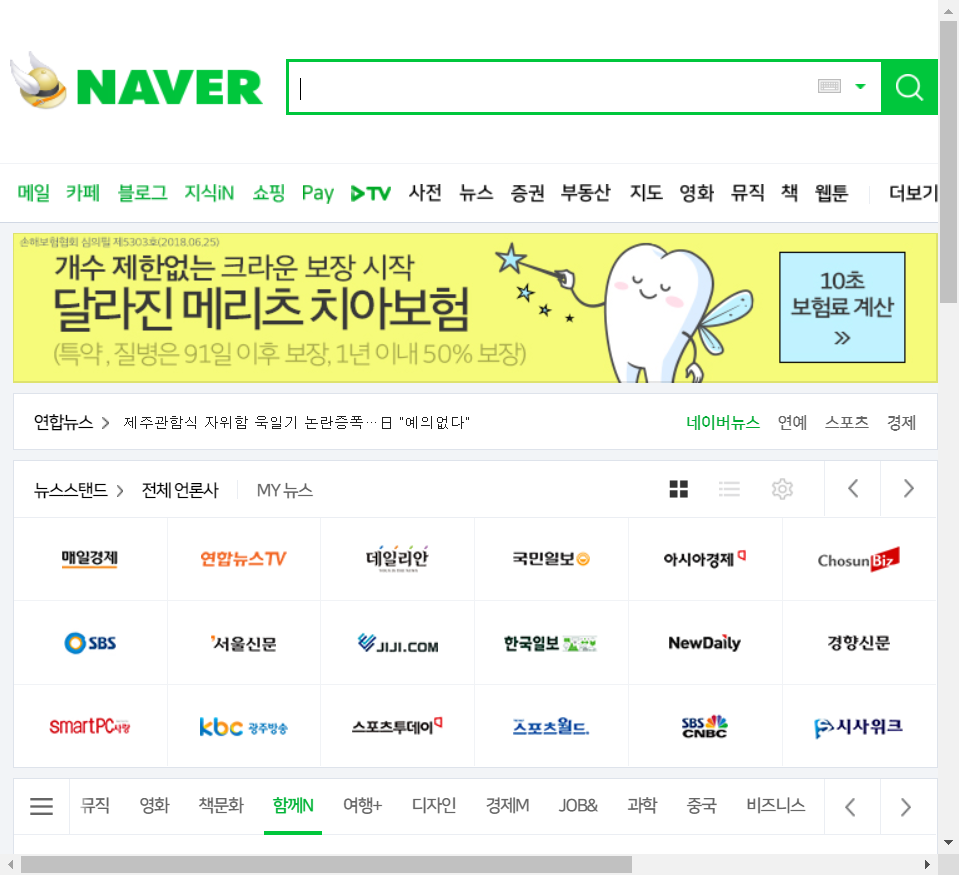

In [83]:
from PIL import Image
im = Image.open('chrome.png')
im

# 멜론에서 TOP 100 차트 가져오기

In [106]:
from bs4 import BeautifulSoup as bs              # 데이터파싱 라이브러리
import urllib.request as req                     # 데이터수신 라이브러리
import pandas as pd                              # 데이터정리 라이브러리 
import datetime                                  # 날짜데이터 라이브러리
import re                                        # 정규표현식 라이브러리

In [107]:
melon_list = pd.DataFrame(columns = ['artist',
                                     'artist_code',
                                     'title',
                                     'title_code',
                                     'rank',
                                     'date',
                                     'hour',
                                     'site'])

In [87]:
melon_list.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 8 columns):
artist         0 non-null object
artist_code    0 non-null object
title          0 non-null object
title_code     0 non-null object
rank           0 non-null object
date           0 non-null object
hour           0 non-null object
site           0 non-null object
dtypes: object(8)
memory usage: 0.0+ bytes


In [88]:
dt_now = datetime.datetime.now() 
print(dt_now)

2018-09-29 16:12:29.286764


아래와 같이 헤더를 만들어 보내면 서버는 요청된 것을 윈도우- 크롬에서 요청한 것으로 인지한다.

In [89]:
url = "http://www.melon.com/chart/index.htm"
header_ = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36"

In [90]:
request = req.Request(url, headers = {'User-Agent':header_})
html = req.urlopen(request)
page = bs(html.read(), 'lxml')

In [91]:
print(html.getcode()) # 200이 뜨면 잘 불러온 것!

200


In [92]:
page.find("div", {'class':'ellipsis rank01'})

<div class="ellipsis rank01"><span>
<a href="javascript:melon.play.playSong('19030101',31316695);" title="하루도 그대를 사랑하지 않은 적이 없었다 재생">하루도 그대를 사랑하지 않은 적이 없었다</a>
</span></div>

In [93]:
song_title = page.find("div", {'class':'ellipsis rank01'}).get_text().strip()
song_artist = page.find("span", {'class':'checkEllipsis'}).get_text().strip()

print(song_title)
print(song_artist)

하루도 그대를 사랑하지 않은 적이 없었다
임창정


In [94]:
page.find("div", {'class':'ellipsis rank01'})

<div class="ellipsis rank01"><span>
<a href="javascript:melon.play.playSong('19030101',31316695);" title="하루도 그대를 사랑하지 않은 적이 없었다 재생">하루도 그대를 사랑하지 않은 적이 없었다</a>
</span></div>

In [95]:
songlists50 = page.find_all('tr', {'class':'lst50'})
songlists100 = page.find_all('tr', {'class':'lst100'})

In [109]:
for half in [songlists50, songlists100]:
    for songs in half:
        song_artist = songs.find("span", {'class':'checkEllipsis'}).get_text().strip()

        ac = songs.find('span', {'class':'checkEllipsis'})
        p = re.compile('[0-9]+')
        song_artist_code = int(p.findall(str(ac))[0])

        song_title = songs.find("div", {'class':'ellipsis rank01'}).get_text().strip()
        song_title_code = int(songs['data-song-no'])
        song_rank = int(songs.find("span", {'class' : "rank "}).get_text())
        song_date = dt_now.strftime('%Y-%m-%d')
        song_hour = dt_now.strftime('%H')
        song_site = "melon"

    
        melon_list = melon_list.append(
            {'artist':song_artist,
             'artist_code':song_artist_code,
             'title' : song_title,
             'title_code' : song_title_code,
             'rank' : song_rank,
             'date' : song_date,
             'hour' : song_hour,
             'site' : song_site}, ignore_index = True)  

In [111]:
melon_list.to_csv(dt_now.strftime("%Y_%m_%d_%H")+".csv", index=False, encoding = 'euc-kr')

In [99]:
####### 엘범사진 src 가져오기

a= []
for name in page.find("a", {'class':'image_typeAll'}).children:
    a.append(name)
a[1]['src']

'https://cdnimg.melon.co.kr/cm/album/images/102/05/805/10205805_500.jpg/melon/resize/120/quality/80/optimize'

In [104]:
urllib.request.urlretrieve(a[1]['src'], "C:/Users/renz/Desktop/{0}.jpg".format(song_title))

('C:/Users/renz/Desktop/유재석(prod.진대호).jpg',
 <http.client.HTTPMessage at 0x245bdfd8860>)

# Amazon Today's Deals

In [112]:
url = "https://www.amazon.com"
header_ = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36"

request = req.Request(url, headers = {'User-Agent':header_})
html = req.urlopen(request)
page = bs(html.read(), 'lxml')

In [113]:
print(html.getcode())

200


In [114]:
left_time = page.find("span", {'id':'100_dealView_1_dealClock'})
print(left_time)

None


기존의 방식으로 남은 시간을 긁어오려하면 나타나지가 않는다. 이는 이 시간이 JavaScript로 되어있기 때문이다. 따라서 이와 같은 정보를 읽어 오는데 selenium이 큰 도움이 될 수 있다. 

In [115]:
# import selenium
from selenium import webdriver
import time
import requests
from selenium.webdriver.common.keys import Keys

In [84]:
path = 'C:/Users/renz/chromedriver.exe' 
driver = webdriver.Chrome(path)

In [40]:
driver.get("https://www.amazon.com/gp/goldbox/")

In [48]:
from bs4 import BeautifulSoup as bs 
html = driver.page_source
soup = BeautifulSoup(html,'lxml')
left_time_sel = soup.find("span", {'id':'100_dealView_1_dealClock'})
print(left_time_sel.text)

UnexpectedAlertPresentException: Alert Text: None
Message: unexpected alert open: {Alert text : 수고하셨어요!!}
  (Session info: chrome=69.0.3497.100)
  (Driver info: chromedriver=2.42.591088 (7b2b2dca23cca0862f674758c9a3933e685c27d5),platform=Windows NT 10.0.17134 x86_64)


In [42]:
driver.execute_script('alert("수고하셨어요!!")')

# Quest 네이버 정치 기사 긁어 오기

In [43]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

url = "https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid2=269" #네이버 정치 기사 페이지

html = urlopen(url)
soup = BeautifulSoup(html,"lxml",from_encoding='utf-8')

articles = soup.findAll("dt")

ex_dl = articles[1].find("a")["href"] ## 정치 기사 메인 페이지에서 기사들로 가는 url 
print(ex_dl)


https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=269&oid=047&aid=0002204379


In [44]:
url_list = []

for link in articles:
    url_list.append(link.find("a")["href"])
    
#url_list


url_list2 = list(set(url_list)) ##중복 제거
url_list2

['https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=269&oid=005&aid=0001135242',
 'https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=269&oid=025&aid=0002853024',
 'https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=269&oid=006&aid=0000093647',
 'https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=269&oid=022&aid=0003306906',
 'https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=269&oid=003&aid=0008829565',
 'https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=269&oid=003&aid=0008829546',
 'https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=269&oid=047&aid=0002204379',
 'https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=269&oid=417&aid=0000345349',
 'https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=269&oid=022&aid=0003306909',
 'https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=269&oid=001&aid=0010369328',
 'https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=269&oid=003&aid=0008829536',

In [45]:
html = urlopen(url_list[0])
soup = BeautifulSoup(html,"html.parser",from_encoding='utf-8')

content = soup.find("div",{"id":"articleBodyContents"})
title = soup.find("h3",{"id":"articleTitle"}).find(text=True)

In [46]:
# -*- coding: utf-8 -*-
import re
hangul = re.compile('[^ ㄱ-ㅣ가-힣.'']+') # # 한글과 띄어쓰기 . ''""를 제외한 모든 글자


test = str(content.find)

result = hangul.sub('',test) # 한글과 띄어쓰기를 제외한 모든 글자 제외
result = re.sub('본문 내용  플레이어   플레이어    오류를 우회하기 위한 함수 추가','',result)
result = re.sub('본문 내용  플레이어   동영상 뉴스       영상 플레이어   플레이어    오류를 우회하기 위한 함수 추가','',result)

print(title)
print(result)

을사늑약ㆍ경술국치시기의 순절자들
  .      의열지사 박재혁 평전 회 국치를 전후하여 순국한 선열들오마이뉴스 김삼웅 기자매국노들만 있었던 것은 아니다.처변삼사를 지키고자 국치를 통탄하면서 그리고 국민의 궐기를 호소하면서 순국순절자가 뒤를 이었다. 대표적인 몇 분을 골랐다.이한응은 경기도 용인 출신으로 관립영어학교를 졸업하고 진사시에 합격하여 한성부지사가 되고 년 관립영어학교 교관으로 전출했다. 년 주영공사의 귀국으로 서리공사에 임명되어 영국에서 활동하고 년 을사늑약이 강제체결되자 치욕과 망국의 한을 참을 길 없어 귀국하기를 단념하고 임지에서 음독 순국하였다. 이 소식이 국내에 알려지면서 민영환조병세 등 분사자가 속출했다.            ...            중학교 국사 교과서에 실린 민영환의 모습.                 중학교 국사 교과서   민영환은 문과에 급제하여 약관에 병조형조판서를 역임하고 미국 공사 등 외교관으로 활동하다가 귀국하여 외부학부탁지부대신을 지내면서 나라의 운명을 바로잡으려고 분투하다가 독립당을 옹호한다는 이유로 대신 자리에서 쫓겨났다.시종무관장 재임 때 을사늑약 폐기를 상소했으나 뜻을 이루지 못하자 국민과 각국 공사에게 보내는 유서를 남기고 자결했다.조병세는 노론파의 명문에서 태어나 음관으로 참봉에 임명되었다가 증광병과에 급제하여 함경도 암행어사대사헌공조판서이조판서우의정좌의정 등 요직을 거쳤다. 동학혁명과 일제침략기에 정계를 은퇴했다가 다시 복귀하여 중추원의장과 임금의 고문인 특진관에 임명되었다.년 폐정개혁 조를 상소하고 년 을사늑약이 강제되자 을사적 처단을 주창한데 이어 이상설 등과 을사늑약의 폐기를 상소했다. 왜경에 연행되어 가평 향리로 추방당하자 년 월 음독자결했다.박승환은 구한국군 참령으로 시위연대 제대대장으로 있던 중 년 월 고종이 일제의 강압에 의해 퇴위당하자 복위운동을 펴기 위해 궁중에 돌입하려 했으나 뜻을 이루지 못했다.그해 월 한국군 해산령이 내리자 이에 불복하여 자결했다. 이를 계기로 다수의 구한국군